# Tutorial: Access ORNL DAAC WMS Service using Python
*Author: Angie Wei, Yaxing Wei*
<br>
*Date: March 9, 2018*
<br>
*Contact for [ORNL DAAC](https://daac.ornl.gov/): uso@daac.ornl.gov*

##### Keywords:  SDAT, WMS, OGC Web Service, Python, `OWSLib`

## Overview
In this tutorial, we will explore how to access ORNL DAAC OGC WMS Service using python OWSLib library. OWSLib is a Python package for client programming with Open Geospatial Consortium (OGC) web service (hence OWS) interface standards, and their related content models. WMS provides a simple HTTP interface for requesting geo-registered map images from one or more distributed geospatial databases. The WMS request is also available from data downloading page of ORNL DAAC Spatial Data Access Tool (SDAT). After connecting to ORNL DAAC WMS service, we will list all available layers. For this example, global foliage clumping index Data derived from MODIS BRDF is used for demonstration. Then we will walkthrough how to get available metadata and operations of this WMS service layer. At last, we will learn how to send request to map the data and plot the legend.

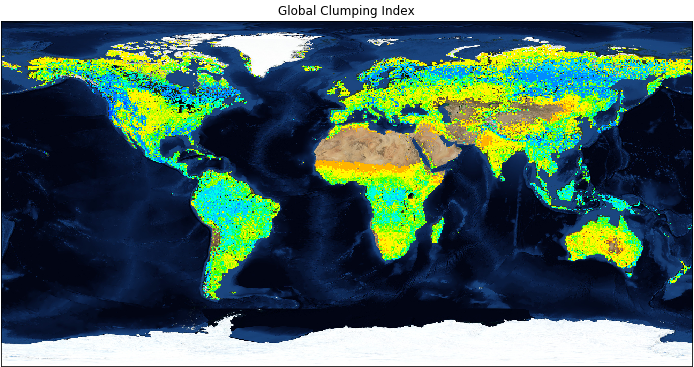

## Source Data
The dataset of Global 500-m Foliage Clumping Index Data Derived from MODIS BRDF in 2006 is used in this example. The original GeoTIFF file is accessible from [ORNL DAAC's Spatial Data Access Tool.](https://webmap.ornl.gov/ogcdown/wcsdown.jsp?dg_id=1531_1)

## Prerequisites:
Python 2.7 or greater. Python package: `OWSLib`, `basemap`, `matplotlib`

## Procedure

### 1. Install Python package OWSLib  
OWSLib is a Python package for client programming with Open Geospatial Consortium (OGC) web service (hence OWS) interface standards, and their related content models. The lateste version is OWSLib 0.16.0. 

Depending upon which `Python` environment you are using, you can install these packages with commands such as:

+ pip install OWSLib

or 

+ conda install -c conda-forge owslib

### 2. Load python modules: basemap and matplotlib
Let's import all the libraries that we will need. Run the following cell

In [1]:
import matplotlib.pyplot as plt             # base plotting package
import matplotlib.image as mpimg            #image plotting package
from mpl_toolkits.basemap import Basemap    # plotting data on map

If the following cell does not execute correctly, then you need to install any package that is missing as seen in the error message. For example, you may need to install basemap or pydap. Depending upon which Python environment and Python version you are using, you can install these packages with commands such as:

+ pip install basemap
or
+ conda install basemap
or 
+ conda install -c conda-forge basemap

After install all required packages, run the cell above again.

### 3. Connect to ORNL DAAC WMS service

First, we need to connet to the ORNL DAAC WMS service using OWSLib package

In [2]:
from owslib.wms import WebMapService
wms = WebMapService('https://webmap.ornl.gov/ogcbroker/wms', version='1.1.1')

Run the following cell to view the service metadata

In [3]:
print ('Service Type:',wms.identification.type)
print('Service Title:',wms.identification.title)

Service Type: OGC:WMS
Service Title: ORNL DAAC WMS Server


### 4. Access available layers in ORNL DAAC WMS service

This step will list all layers whose WMS service is available in ORNL DAAC

In [4]:
list(wms.contents)

['ORNL_DAAC_WMS',
 '549_1',
 '549_10',
 '549_19',
 '549_37',
 '549_46',
 '549_55',
 '549_28',
 '549_64',
 '549_73',
 '549_2',
 '549_11',
 '549_20',
 '549_38',
 '549_47',
 '549_56',
 '549_29',
 '549_65',
 '549_74',
 '549_3',
 '549_12',
 '549_21',
 '549_39',
 '549_48',
 '549_57',
 '549_30',
 '549_66',
 '549_75',
 '549_4',
 '549_13',
 '549_22',
 '549_40',
 '549_49',
 '549_58',
 '549_31',
 '549_67',
 '549_76',
 '549_5',
 '549_14',
 '549_23',
 '549_41',
 '549_50',
 '549_59',
 '549_32',
 '549_68',
 '549_77',
 '549_6',
 '549_15',
 '549_24',
 '549_42',
 '549_51',
 '549_60',
 '549_33',
 '549_69',
 '549_78',
 '549_7',
 '549_16',
 '549_25',
 '549_43',
 '549_52',
 '549_61',
 '549_34',
 '549_70',
 '549_79',
 '549_8',
 '549_17',
 '549_26',
 '549_44',
 '549_53',
 '549_62',
 '549_35',
 '549_71',
 '549_80',
 '549_9',
 '549_18',
 '549_27',
 '549_45',
 '549_54',
 '549_63',
 '549_36',
 '549_72',
 '549_81',
 '994_33',
 '994_22',
 '994_55',
 '994_44',
 '994_34',
 '994_23',
 '994_56',
 '994_45',
 '994_35',
 

Select a WMS layer that you would like to use to find details about. Retrieve the layer object by id: '1531_1' 

In [5]:
layer = wms['1531_1'] 

Get the descriptive title of this layer 

In [6]:
layer.title

'global clumping index in 2006'

We can now getting the bounding box (in WGS84) of this layer 

In [7]:
layer.boundingBoxWGS84 

(-180.0, -90.0, 180.0, 90.0)

coordinate reference systems (CRS) supported by this layer

In [8]:
layer.crsOptions

['epsg:3785',
 'epsg:54008',
 'epsg:6842',
 'epsg:54004',
 'epsg:900913',
 'epsg:4326',
 'epsg:54009']

list styles supported by this layer 

In [9]:
layer.styles 

{'default': {'legend': 'https://webmap.ornl.gov/ogcbroker/wms?version=1.1.1&service=WMS&request=GetLegendGraphic&layer=1531_1&format=image/png&STYLE=default',
  'title': 'default'}}

### 5. Operations, their URLs, and available formats

List all operations supported by ORNL DAAC WMS 

In [10]:
[op.name for op in wms.operations] 

['GetCapabilities',
 'GetMap',
 'GetFeatureInfo',
 'DescribeLayer',
 'GetLegendGraphic',
 'GetStyles']

get GetMap operation object 

In [11]:
 op = wms.getOperationByName('GetMap') 

methods supported by GetMap operation 

In [12]:
op.methods 

[{'type': 'Get', 'url': 'https://webmap.ornl.gov/ogcbroker/wms?'},
 {'type': 'Post', 'url': 'https://webmap.ornl.gov/ogcbroker/wms?'}]

image formats supported by GetMap operation 

In [13]:
op.formatOptions 

['image/png',
 'image/gif',
 'image/svg+xml',
 'application/x-pdf',
 'image/jpeg',
 'image/png; mode=8bit',
 'image/tiff',
 'application/vnd.google-earth.kml+xml',
 'application/vnd.google-earth.kmz']

### 6. Make a request for map imagery

send the getmap request

In [14]:
 img = wms.getmap(    
      layers=['1531_1'], 
      styles=['default'], 
      srs='EPSG:4326', 
      bbox=(-180, -90, 180, 90), 
      size=(600, 300), 
      format='image/png', 
      transparent=True)

save image in a local file

In [15]:
out = open('global_clumping_index.png', 'wb')
out.write(img.read()) 
out.close()

### 7. Make a request for map legend image

get legend image URL

In [16]:
legend_url = layer.styles['default']['legend'] 

retrieve legend image

In [17]:
from urllib.request import urlretrieve  
urlretrieve(legend_url, 'legend.png')

('legend.png', <http.client.HTTPMessage at 0xa6fb8d0>)

display legend

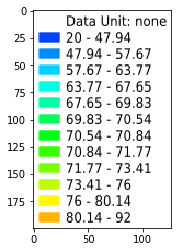

In [18]:
legendimg=mpimg.imread('legend.png')
imgplot = plt.imshow(legendimg)
plt.show()

### 8. Display image on basemap

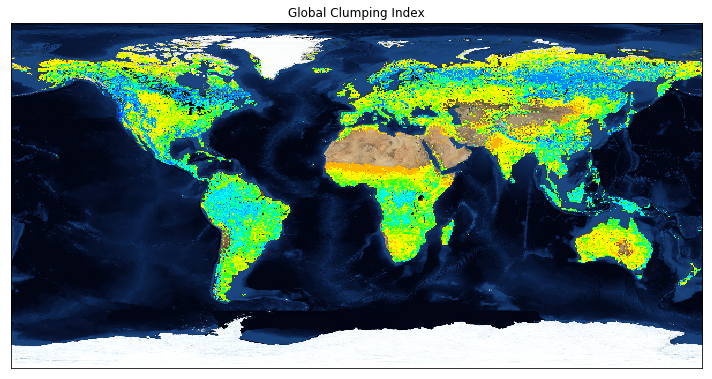

In [19]:
fig = plt.figure(figsize=(12,8))                  # create the figure and axes instances
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
extent = [-180, 180, -90, 90]                     # set basemap extent [left, right, bottom, top]
m = Basemap(llcrnrlon=extent[0],                  # set up of basemap
            urcrnrlon=extent[1], 
            llcrnrlat=extent[2], 
            urcrnrlat=extent[3], 
            resolution='l',
            lat_ts=20,
            epsg=4326)
m.bluemarble(scale=0.5);                          # use blue marble as basemap                 
m.warpimage(image='global_clumping_index.png')    # display image

#m.wmsimage('https://webmap.ornl.gov/ogcbroker/wms?',xpixels=600, ypixels=300, layers=['1531_1'],transparent=True)
ax.set_title('Global Clumping Index')
plt.show()